In [15]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import matplotlib.pyplot as plt 
from utils.plot_utils import *
from matplotlib.backends.backend_pdf import PdfPages

# ED Fig. 1a 111 RNA/ATAC metadata table

In [6]:
meta = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/txt/Sample_metadata.txt',sep='\t')

In [7]:
meta = meta[meta.Dataset=='RNA/ATAC']

In [8]:
meta

,Dataset,Sample,Region,Condition,Condition-S,Sex,Ancestry,AgeDeath,RIN,PMI,Smoking,Antidepressant,Overlap with RNA/ATAC
0,RNA/ATAC,MS0007NN/MS0001HH,dlPFC,CON,CON,F,W,18.0,7.4,21.4,N,N,
1,RNA/ATAC,MS0008OO/MS0002II,dlPFC,CON,CON,M,B,39.0,8.2,21.5,Y,N,
2,RNA/ATAC,MS0009PP/MS0003JJ,dlPFC,MDD,MDD,M,W,54.0,9.2,16.4,N,Y,
3,RNA/ATAC,MS0010QQ/MS0004KK,dlPFC,PTSD,PTSD,M,W,53.0,8.0,23.3,Y,N,
4,RNA/ATAC,MS0011RR/MS0005LL,dlPFC,MDD,MDD-S,M,B,69.0,6.4,38.0,Y,Y,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,RNA/ATAC,MS0214CC/MS0214WW,dlPFC,PTSD,PTSD,M,W,28.0,5.7,20.2,Y,N,
107,RNA/ATAC,MS0214DD/MS0214XX,dlPFC,MDD,MDD,F,W,54.0,8.9,19.2,Y,Y,
108,RNA/ATAC,MS0214EE/MS0214YY,dlPFC,MDD,MDD-S,M,W,67.0,7.2,15.3,N,Y,
109,RNA/ATAC,MS0214FF/MS0214ZZ,dlPFC,CON,CON,M,W,25.0,7.9,20.2,N,N,


In [9]:
con = meta[meta.Condition=='CON']
mdd = meta[meta.Condition=='MDD']
ptsd = meta[meta.Condition=='PTSD']

In [12]:
sex_all = []
ancestry_all = []
age_all = []
pmi_all = []
rin_all = []
smoking_all = []
anti_all = []

for data in [con,mdd,ptsd]:
    sex = round(data[data.Sex=='M'].shape[0]/data.shape[0],2)
    ancestry = round(data[data.Ancestry=='W'].shape[0]/data.shape[0],2)
    age = str(round(data.AgeDeath.describe()['mean'],2)) + ' ± ' + str(round(con['AgeDeath'].describe()['std'],2))
    pmi = str(round(data.PMI.describe()['mean'],2)) + ' ± ' + str(round(con['PMI'].describe()['std'],2))
    rin = str(round(data.RIN.describe()['mean'],2)) + ' ± ' + str(round(con['RIN'].describe()['std'],2))
    smoking = round(data[data.Smoking=='Y'].shape[0]/data.shape[0],2)
    anti = round(data[data.Antidepressant=='Y'].shape[0]/data.shape[0],2)
    sex_all.append(sex)
    ancestry_all.append(ancestry)
    age_all.append(age)
    pmi_all.append(pmi)
    rin_all.append(rin)
    smoking_all.append(smoking)
    anti_all.append(anti)

In [13]:
df = pd.DataFrame(data=[sex_all,ancestry_all,age_all,pmi_all,rin_all,smoking_all,anti_all],
             columns=['CON (N=39)','MDD (N=36)','PTSD (N=36)'],
             index=['Sex (% Male)','Ancestry (% Caucasian)','Age at Death (mean ± std)','PMI (mean ± std)','RIN (mean ± std)','Smoking (% Yes)','Antidepressant (% Yes)'])

In [14]:
pdf_table = []
pdf_table.append(df)

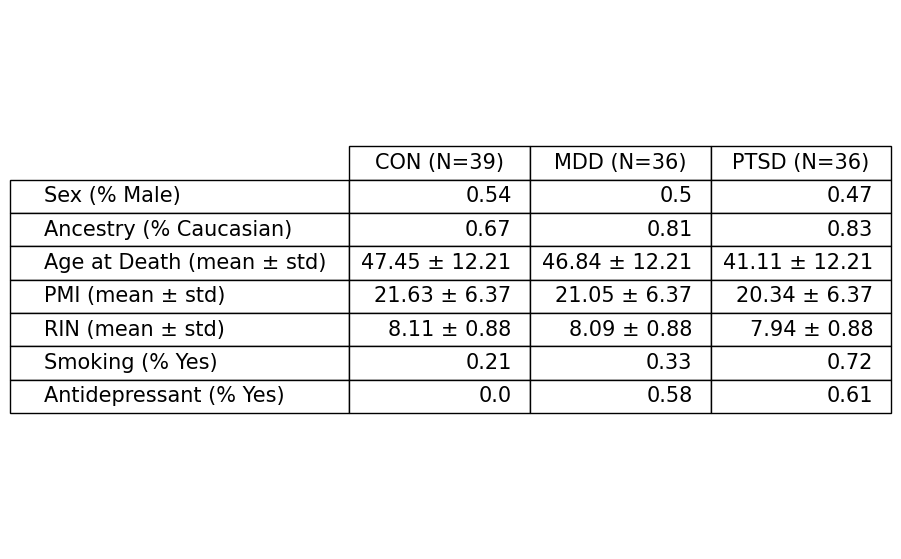

In [16]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'
fig, ax =plt.subplots(figsize=(7,7))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=df.index,loc='center')
the_table.scale(1,2)

# ED Fig. 1b Multiome metadata table

In [20]:
meta = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/txt/Sample_metadata.txt',sep='\t')

In [21]:
meta = meta[meta.Dataset=='Multiome']

In [22]:
con = meta[meta.Condition=='CON']
mdd = meta[meta.Condition=='MDD']
ptsd = meta[meta.Condition=='PTSD']

In [25]:
sex_all = []
ancestry_all = []
age_all = []
pmi_all = []
rin_all = []
smoking_all = []
anti_all = []

for data in [con,mdd,ptsd]:
    sex = round(data[data.Sex=='M'].shape[0]/data.shape[0],2)
    ancestry = round(data[data.Ancestry=='W'].shape[0]/data.shape[0],2)
    age = str(round(data.AgeDeath.describe()['mean'],2)) + ' ± ' + str(round(con['AgeDeath'].describe()['std'],2))
    pmi = str(round(data.PMI.describe()['mean'],2)) + ' ± ' + str(round(con['PMI'].describe()['std'],2))
    rin = str(round(data.RIN.describe()['mean'],2)) + ' ± ' + str(round(con['RIN'].describe()['std'],2))
    smoking = round(data[data.Smoking=='Y'].shape[0]/data.shape[0],2)
    anti = round(data[data.Antidepressant=='Y'].shape[0]/data.shape[0],2)
    sex_all.append(sex)
    ancestry_all.append(ancestry)
    age_all.append(age)
    pmi_all.append(pmi)
    rin_all.append(rin)
    smoking_all.append(smoking)
    anti_all.append(anti)

In [28]:
df = pd.DataFrame(data=[sex_all,ancestry_all,age_all,pmi_all,rin_all,smoking_all,anti_all],
             columns=['CON (N=9)','MDD (N=4)','PTSD (N=12)'],
             index=['Sex (% Male)','Ancestry (% Caucasian)','Age at Death (mean ± std)','PMI (mean ± std)','RIN (mean ± std)','Smoking (% Yes)','Antidepressant (% Yes)'])

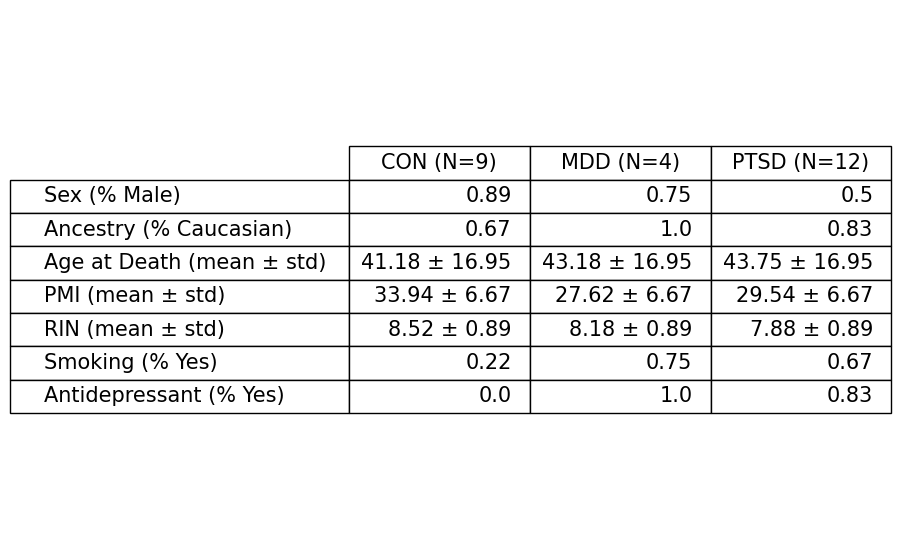

In [30]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'
fig, ax =plt.subplots(figsize=(7,7))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=df.index,loc='center')
the_table.scale(1,2)

# ED Fig. 1c Xenium metadata table

In [34]:
meta = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/txt/Sample_metadata.txt',sep='\t')

In [35]:
meta = meta[meta.Dataset=='Xenium']

In [36]:
con = meta[meta.Condition=='CON']
mdd = meta[meta.Condition=='MDD']
ptsd = meta[meta.Condition=='PTSD']

In [37]:
sex_all = []
ancestry_all = []
age_all = []
pmi_all = []
rin_all = []
smoking_all = []
anti_all = []

for data in [con,mdd,ptsd]:
    sex = round(data[data.Sex=='M'].shape[0]/data.shape[0],2)
    ancestry = round(data[data.Ancestry=='W'].shape[0]/data.shape[0],2)
    age = str(round(data.AgeDeath.describe()['mean'],2)) + ' ± ' + str(round(con['AgeDeath'].describe()['std'],2))
    pmi = str(round(data.PMI.describe()['mean'],2)) + ' ± ' + str(round(con['PMI'].describe()['std'],2))
    rin = str(round(data.RIN.describe()['mean'],2)) + ' ± ' + str(round(con['RIN'].describe()['std'],2))
    smoking = round(data[data.Smoking=='Y'].shape[0]/data.shape[0],2)
    anti = round(data[data.Antidepressant=='Y'].shape[0]/data.shape[0],2)
    sex_all.append(sex)
    ancestry_all.append(ancestry)
    age_all.append(age)
    pmi_all.append(pmi)
    rin_all.append(rin)
    smoking_all.append(smoking)
    anti_all.append(anti)

In [38]:
df = pd.DataFrame(data=[sex_all,ancestry_all,age_all,pmi_all,rin_all,smoking_all,anti_all],
             columns=['CON (N=9)','MDD (N=4)','PTSD (N=12)'],
             index=['Sex (% Male)','Ancestry (% Caucasian)','Age at Death (mean ± std)','PMI (mean ± std)','RIN (mean ± std)','Smoking (% Yes)','Antidepressant (% Yes)'])

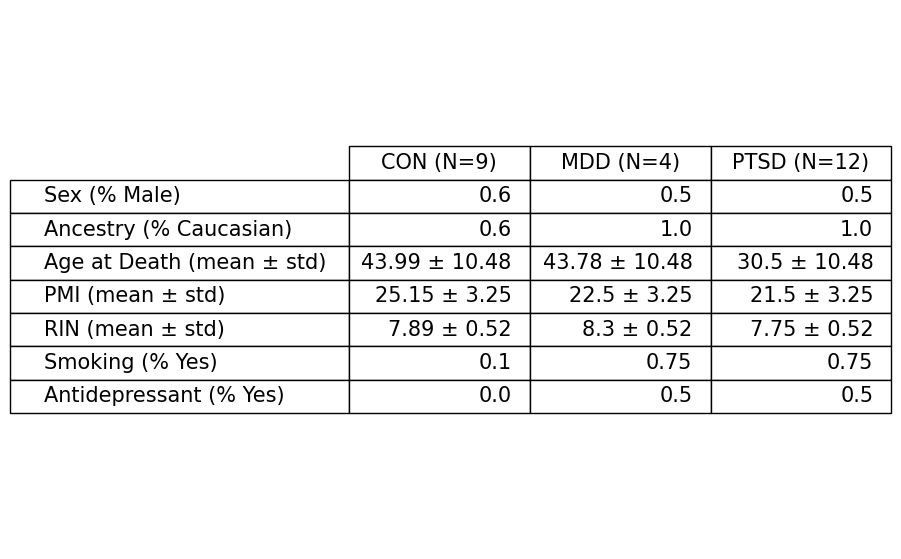

In [39]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'
fig, ax =plt.subplots(figsize=(7,7))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,rowLabels=df.index,loc='center')
the_table.scale(1,2)